<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Blood_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory

Loading dataset

In [43]:
train_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Blood Cell classification/dataset2-master/dataset2-master/images/TRAIN/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
    )
validation_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Blood Cell classification/dataset2-master/dataset2-master/images/TEST_SIMPLE/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))
test_ds = image_dataset_from_directory(
    directory='/content/drive/MyDrive/Blood Cell classification/dataset2-master/dataset2-master/images/TEST/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 9977 files belonging to 4 classes.
Found 71 files belonging to 4 classes.
Found 2487 files belonging to 4 classes.


In [44]:
#classes in training data
class_names = train_ds.class_names
print(class_names)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


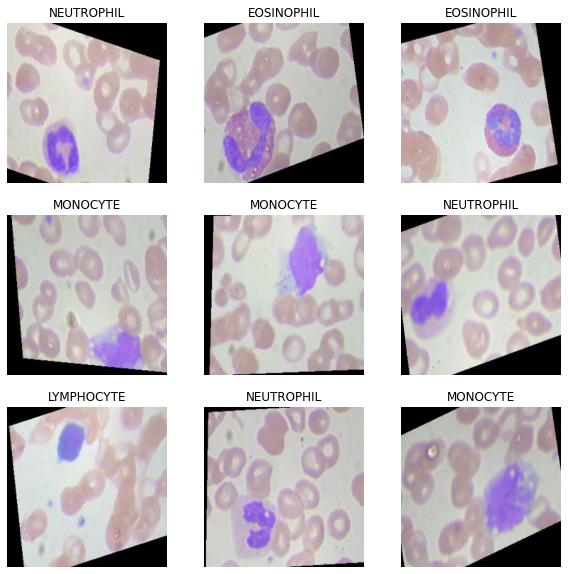

In [45]:
#checking first 10 images from training set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

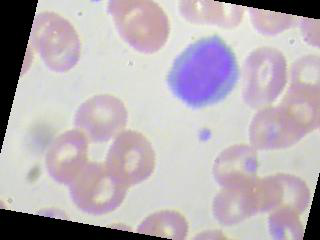

In [46]:
#randomly selecting a sample from LYMPHOCYTE
image_lymp = '/content/drive/MyDrive/Blood Cell classification/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_204.jpeg'
get_image_lymp= PIL.Image.open(image_lymp)
get_image_lymp

I can't quite find a difference between LYMPHOCYTE and MONOCYTE, so printing a random sample of MONOCYTE to find clear difference.

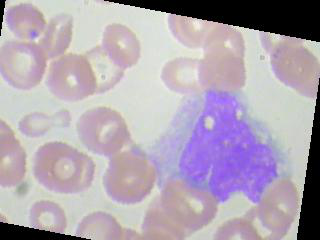

In [47]:
#randomly selecting a sample from MONOCYTE
image_mono = '/content/drive/MyDrive/Blood Cell classification/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_0_435.jpeg'
get_image_mono = PIL.Image.open(image_mono)
get_image_mono

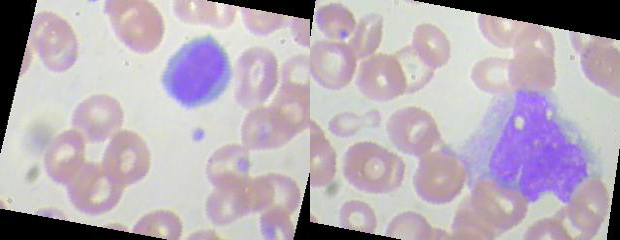

In [48]:
image1 = get_image_lymp.resize((310, 240))
image1_size = image1.size
image2_size = get_image_mono.size
new_image = Image.new('RGB',(2*image1_size[0], image1_size[1]), (250,250,250))
new_image.paste(image1,(0,0))
new_image.paste(get_image_mono,(image1_size[0],0))
new_image

LYMPHOCYTE looks littel more dense.